In [1]:
#importing Libraries
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
dataset.shape

(1000, 2)

In [4]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
dataset.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
import nltk
import re

In [9]:
#nltk is a library in python used for human launguage data processing like tokenization,processing etc

In [10]:
nltk.download('stopwords')#is,for these type of words what doesnt add ant importance

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #for stemming the word like playing to play

In [12]:
cleandata= []
for i in range(0,1000):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = dataset['Review'][i])#replaces words which are not a letter
    review = review.lower()#converting to lower Case
    review_words = review.split(' ') #Splitting to words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    pstream = PorterStemmer()
    review = [pstream.stem(word) for word in review_words]
    review = ' '.join(review)
    cleandata.append(review)

In [13]:
cleandata[:1500]

['wow    love place ',
 'crust good ',
 'tasti textur nasti ',
 'stop late may bank holiday rick steve recommend love ',
 'select menu great price ',
 'get angri want damn pho ',
 'honeslti tast fresh  ',
 'potato like rubber could tell made ahead time kept warmer ',
 'fri great ',
 'great touch ',
 'servic prompt ',
 'would go back ',
 'cashier care ever say still end wayyy overpr ',
 'tri cape cod ravoli  chicken  cranberri   mmmm ',
 'disgust pretti sure human hair ',
 'shock sign indic cash ',
 'highli recommend ',
 'waitress littl slow servic ',
 'place worth time  let alon vega ',
 'like ',
 'burritto blah ',
 'food  amaz ',
 'servic also cute ',
 'could care less    interior beauti ',
 'perform ',
 'right    red velvet cake     ohhh stuff good ',
 '  never brought salad ask ',
 'hole wall great mexican street taco  friendli staff ',
 'took hour get food   tabl restaur food luke warm  sever run around like total overwhelm ',
 'worst salmon sashimi ',
 'also combo like burger  fri

In [14]:
#machiene learning models deal doesnt deal with raw data so here we have to convert to numerical counts of words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(max_features=1500)
x = cvect.fit_transform(cleandata).toarray()
y = dataset.iloc[:,1].values

In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [18]:
from sklearn.model_selection import train_test_split #to train the data

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [21]:
#importing library naive bayes for text classification
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [22]:
y_predict = classifier.predict(x_test)

In [23]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [24]:
#calculating accuracy,precicision score
from sklearn.metrics import precision_score,accuracy_score,recall_score
pscore = precision_score(y_test,y_predict)
ascore = accuracy_score(y_test,y_predict)
rscore = recall_score(y_test,y_predict)
#or we can print classification report 

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [26]:
print(pscore)

0.7641509433962265


In [27]:
print(ascore)

0.765


In [28]:
print(rscore)

0.7864077669902912


In [29]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test,y_predict)

In [30]:
cmatrix

array([[72, 25],
       [22, 81]], dtype=int64)

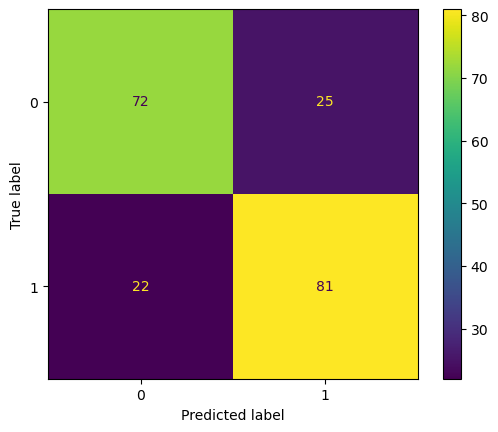

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
graph = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
graph.plot()

In [32]:
#plotting graph to cleary visualise confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

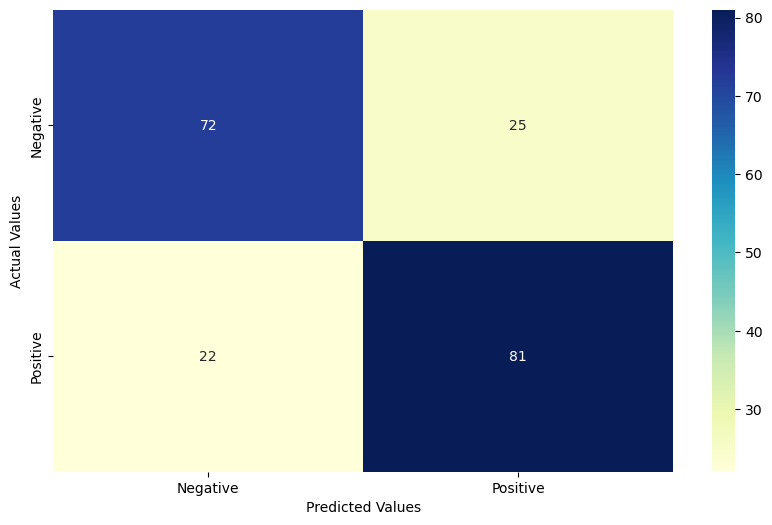

In [33]:
%matplotlib inline
plt.figure(figsize=(10,6))
hmap = sns.heatmap(cmatrix,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels = ['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [37]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha = i)
    temp_classifier.fit(x_train,y_train)
    temp_ypred = temp_classifier.predict(x_test)
    score = accuracy_score(y_test,temp_ypred)
    print("Accuracy Score for alpha = {} is {}%".format(round(i,1),round(score*100,3)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print('-----------------------------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value  as  {}".format(round(best_accuracy*100,2),round(alpha_val,1)))
    

Accuracy Score for alpha = 0.1 is 78.0%
Accuracy Score for alpha = 0.2 is 78.5%
Accuracy Score for alpha = 0.3 is 78.0%
Accuracy Score for alpha = 0.4 is 78.0%
Accuracy Score for alpha = 0.5 is 77.5%
Accuracy Score for alpha = 0.6 is 77.5%
Accuracy Score for alpha = 0.7 is 77.5%
Accuracy Score for alpha = 0.8 is 77.0%
Accuracy Score for alpha = 0.9 is 76.5%
Accuracy Score for alpha = 1.0 is 76.5%
-----------------------------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value  as  0.2


In [39]:
classifier  = MultinomialNB(alpha = 0.2)
classifier.fit(x_train,y_train)


MultinomialNB(alpha=0.2)

In [55]:
def predict_review(sample_review):#predicting sentiment 
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split(' ')
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = cvect.transform([final_review]).toarray()
    return classifier.predict(temp)

In [47]:
review = "He was an Intelligent boy"
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")

Positive Review


In [49]:
review = "He was a bit arrogant"
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")

Negative Review


In [51]:
review = "Nothing Special about it"
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")

Negative Review


In [53]:
review = "Absolutely loved it! Highly recommend to everyone."
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")
review = "The service was excellent and the staff was friendly."
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")
review = "Great value for money. Will definitely come back!"
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")

review = "Exceeded my expectations. Everything was perfect."
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")

review = "Delicious food and cozy atmosphere."
if predict_review(review):
    print("Positive Review")
else:
    print("Negative Review")


Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
